In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%qtconsole

# notes:
maybe I should fix regularization at 1

In [66]:
%cd /Users/cgu3/Documents/lsc-gnn
%pwd

/Users/cgu3/Documents/lsc-gnn


/Users/cgu3/Documents/lsc-gnn/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


'/Users/cgu3/Documents/lsc-gnn'

In [32]:
# calculate mean and std for accuracy group by dataset and target_ratio
# df_first = df[df['regularization'] == 0].groupby(['dataset', 'target_ratio', 'perturb_rate']).agg({'accuracy':['mean', 'std']})
# df_first = (100 * df_first).round(2)
# # flatten the columns
# df_first.columns = ['_'.join(col).strip('_') for col in df_first.columns.values]
# # create a new column with the name 'GAT_full" using in format of string accuracy_mean +- accuracy_std
# df_first['GAT_full'] = df_first['accuracy_mean'].round(2).astype(str) + "±" + df_first['accuracy_std'].round(2).astype(str)
# df_first = df_first[['GAT_full']]

In [216]:
df_best = pd.read_json('results/results_LSC.json', lines=True)
df_best['target_ratio'] = df_best['target_ratio'].apply(lambda x: f"{x:.2f}")
df_best['model_type'] = 'LSCGNN'
df_best['layer_type'] = 'GAT'

df_best = df_best.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).apply(lambda x: x.loc[x['val_loss'].idxmin()], include_groups=False)[['accuracy', 'regularization', 'execution_time']]
# calculate mean and std for accuracy group by dataset and target_ratio
df_best = df_best.groupby(['dataset', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).agg({'accuracy':['mean', 'std'], 'execution_time': ['mean']})
df_best['accuracy'] = (100 * df_best['accuracy']).round(2)
# flatten the columns
df_best.columns = ['_'.join(col).strip('_') for col in df_best.columns.values]
# create a new column with the name "LSC-GNN" using in format of string accuracy_mean +- accuracy_std
df_best['mean_std'] = df_best['accuracy_mean'].round(2).astype(str) + "±" + df_best['accuracy_std'].round(2).astype(str)
# df_best.rename(columns={'accuracy_mean': 'With regularizaion'}, inplace=True)
df_best = df_best.reset_index()
df_best

,dataset,target_ratio,perturb_rate,model_type,layer_type,accuracy_mean,accuracy_std,execution_time_mean,mean_std
0,CiteSeer,0.50,0.00,LSCGNN,GAT,70.03,1.07,9.965,70.03±1.07
1,CiteSeer,0.50,0.05,LSCGNN,GAT,71.20,1.50,9.668,71.2±1.5
2,CiteSeer,0.50,0.10,LSCGNN,GAT,70.09,1.03,9.885,70.09±1.03
3,CiteSeer,0.50,0.15,LSCGNN,GAT,69.19,1.21,9.775,69.19±1.21
4,CiteSeer,0.50,0.20,LSCGNN,GAT,69.97,1.16,9.844,69.97±1.16
...,...,...,...,...,...,...,...,...,...
58,PubMed,0.90,0.10,LSCGNN,GAT,84.44,1.08,10.482,84.44±1.08
59,PubMed,0.90,0.15,LSCGNN,GAT,81.76,3.78,10.547,81.76±3.78
60,PubMed,0.90,0.20,LSCGNN,GAT,81.02,2.42,10.569,81.02±2.42
61,PubMed,0.90,0.25,LSCGNN,GAT,79.59,1.96,10.565,79.59±1.96


In [217]:
df_lsc_jaccard = pd.read_json('results/results_LSC_jaccard.json', lines=True)
df_lsc_jaccard['target_ratio'] = df_lsc_jaccard['target_ratio'].apply(lambda x: f"{x:.2f}")
df_lsc_jaccard['model_type'] = 'LSCGNN_Jaccard'
df_lsc_jaccard['layer_type'] = 'GAT'

df_lsc_jaccard = df_lsc_jaccard.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).apply(lambda x: x.loc[x['val_loss'].idxmin()], include_groups=False)[['accuracy', 'regularization', 'execution_time']]
# calculate mean and std for accuracy group by dataset and target_ratio
df_lsc_jaccard = df_lsc_jaccard.groupby(['dataset', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).agg({'accuracy':['mean', 'std'], 'execution_time': ['mean']})
df_lsc_jaccard['accuracy'] = (100 * df_lsc_jaccard['accuracy']).round(2)
# flatten the columns
df_lsc_jaccard.columns = ['_'.join(col).strip('_') for col in df_lsc_jaccard.columns.values]
# create a new column with the name "LSC-GNN" using in format of string accuracy_mean +- accuracy_std
df_lsc_jaccard['mean_std'] = df_lsc_jaccard['accuracy_mean'].round(2).astype(str) + "±" + df_lsc_jaccard['accuracy_std'].round(2).astype(str)
# df_lsc_jaccard.rename(columns={'accuracy_mean': 'With regularizaion'}, inplace=True)
df_lsc_jaccard = df_lsc_jaccard.reset_index()
df_lsc_jaccard

,dataset,target_ratio,perturb_rate,model_type,layer_type,accuracy_mean,accuracy_std,execution_time_mean,mean_std
0,CiteSeer,0.50,0.00,LSCGNN_Jaccard,GAT,70.54,0.63,15.713870,70.54±0.63
1,CiteSeer,0.50,0.05,LSCGNN_Jaccard,GAT,69.76,1.32,15.510470,69.76±1.32
2,CiteSeer,0.50,0.10,LSCGNN_Jaccard,GAT,68.98,0.59,14.745630,68.98±0.59
3,CiteSeer,0.50,0.15,LSCGNN_Jaccard,GAT,68.97,1.40,16.090410,68.97±1.4
4,CiteSeer,0.50,0.20,LSCGNN_Jaccard,GAT,68.44,1.32,15.167230,68.44±1.32
...,...,...,...,...,...,...,...,...,...
58,PubMed,0.90,0.10,LSCGNN_Jaccard,GAT,82.75,1.15,33.874285,82.75±1.15
59,PubMed,0.90,0.15,LSCGNN_Jaccard,GAT,80.77,1.30,36.478885,80.77±1.3
60,PubMed,0.90,0.20,LSCGNN_Jaccard,GAT,79.84,0.83,35.068155,79.84±0.83
61,PubMed,0.90,0.25,LSCGNN_Jaccard,GAT,79.12,1.37,34.996260,79.12±1.37


In [218]:
df_baseline = pd.read_json('results/results_baseline.json', lines=True)
df_baseline['target_ratio'] = df_baseline['target_ratio'].apply(lambda x: f"{x:.2f}")

# calculate mean and std for accuracy group by dataset and target_ratio and use_edge_for_prediction
df_baseline_agg = df_baseline.groupby(['dataset', 'target_ratio', 'perturb_rate',  'model_type', 'layer_type']).agg({'accuracy':['mean', 'std'], 'execution_time': ['mean']})
df_baseline_agg['accuracy'] = (100 * df_baseline_agg['accuracy']).round(2)
# flatten the columns
df_baseline_agg.columns = ['_'.join(col).strip('_') for col in df_baseline_agg.columns.values]
df_baseline_agg['mean_std'] = df_baseline_agg['accuracy_mean'].apply(lambda x: "{:.2f}".format(x)) + "±" + \
                              df_baseline_agg['accuracy_std'].apply(lambda x: "{:.2f}".format(x))

# Reset index so we can pivot properly
df_baseline_agg = df_baseline_agg.reset_index()

df_baseline_agg


,dataset,target_ratio,perturb_rate,model_type,layer_type,accuracy_mean,accuracy_std,execution_time_mean,mean_std
0,CiteSeer,0.50,0.00,GCNJaccard,GCNConv,69.88,1.05,7.173230,69.88±1.05
1,CiteSeer,0.50,0.00,GCNSVD,GCNConv,71.08,0.48,11.065015,71.08±0.48
2,CiteSeer,0.50,0.00,LSCGNN,GATConv,68.34,1.48,9.289720,68.34±1.48
3,CiteSeer,0.50,0.00,LSCGNN,GCNConv,69.04,0.83,7.043420,69.04±0.83
4,CiteSeer,0.50,0.00,ProGNN,GCNConv,74.70,0.30,2311.670467,74.70±0.30
...,...,...,...,...,...,...,...,...,...
289,PubMed,0.90,0.25,LSCGNN,GCNConv,78.35,1.12,8.453320,78.35±1.12
290,PubMed,0.90,0.30,GCNJaccard,GCNConv,78.20,0.97,16.692430,78.20±0.97
291,PubMed,0.90,0.30,GCNSVD,GCNConv,80.70,0.15,1192.119775,80.70±0.15
292,PubMed,0.90,0.30,LSCGNN,GATConv,77.58,0.65,10.535410,77.58±0.65


# Combine the results from the baseline model run and the LSCGNN

In [219]:
# combine df_first and df_best horizontally
df_combined = pd.concat([df_best, df_lsc_jaccard, df_baseline_agg], axis=0)
df_combined = df_combined.reset_index(drop=True)
# convert to long format
# df_combined = df_combined.melt(id_vars=['dataset', 'target_ratio', 'perturb_rate'], var_name='model', value_name='accuracy')
df_combined['model'] = df_combined['model_type'] + '_' + df_combined['layer_type']
# mapping value in model to 'LSC-GNN' and 'GAT_full'
df_combined['model'] = df_combined['model'].replace({'LSCGNN_GAT': 'LSCGNN',
                                                     'LSCGNN_GATConv': 'GAT',
                                                     'LSCGNN_GCNConv': 'GCN',
                                                     'ProGNN_GCNConv': 'ProGNN',
                                                     'GCNSVD_GCNConv': 'GCNSVD',
                                                     'GCNJaccard_GCNConv': 'GCN-Jaccard',
                                                     'LSCGNN_Jaccard_GAT': 'LSC+Jaccard'})
desired_order = ['Cora', 'CiteSeer', 'PubMed']  # Change this as needed
# Reorder dataset
df_combined.loc[:, 'dataset'] = pd.Categorical(df_combined['dataset'], categories=desired_order, ordered=True)

df_combined = df_combined[['dataset', 'target_ratio', 'perturb_rate', 'model', 'accuracy_mean', 'mean_std', 'execution_time_mean']]
df_combined

,dataset,target_ratio,perturb_rate,model,accuracy_mean,mean_std,execution_time_mean
0,CiteSeer,0.50,0.00,LSCGNN,70.03,70.03±1.07,9.965000
1,CiteSeer,0.50,0.05,LSCGNN,71.20,71.2±1.5,9.668000
2,CiteSeer,0.50,0.10,LSCGNN,70.09,70.09±1.03,9.885000
3,CiteSeer,0.50,0.15,LSCGNN,69.19,69.19±1.21,9.775000
4,CiteSeer,0.50,0.20,LSCGNN,69.97,69.97±1.16,9.844000
...,...,...,...,...,...,...,...
415,PubMed,0.90,0.25,GCN,78.35,78.35±1.12,8.453320
416,PubMed,0.90,0.30,GCN-Jaccard,78.20,78.20±0.97,16.692430
417,PubMed,0.90,0.30,GCNSVD,80.70,80.70±0.15,1192.119775
418,PubMed,0.90,0.30,GAT,77.58,77.58±0.65,10.535410


In [220]:
 df_combined[(df_combined['target_ratio'] == '0.70') & (df_combined['perturb_rate'] == 0.20)]

,dataset,target_ratio,perturb_rate,model,accuracy_mean,mean_std,execution_time_mean
11,CiteSeer,0.70,0.2,LSCGNN,68.11,68.11±1.27,9.813000
32,Cora,0.70,0.2,LSCGNN,81.24,81.24±2.0,9.510000
53,PubMed,0.70,0.2,LSCGNN,81.21,81.21±1.21,10.216000
74,CiteSeer,0.70,0.2,LSC+Jaccard,71.42,71.42±0.95,16.771560
95,Cora,0.70,0.2,LSC+Jaccard,78.15,78.15±1.95,16.513620
116,PubMed,0.70,0.2,LSC+Jaccard,81.11,81.11±1.69,34.041335
181,CiteSeer,0.70,0.2,GCN-Jaccard,68.45,68.45±1.36,7.180980
182,CiteSeer,0.70,0.2,GCNSVD,65.33,65.33±0.34,11.356825
183,CiteSeer,0.70,0.2,GAT,62.17,62.17±2.23,9.619680
184,CiteSeer,0.70,0.2,GCN,64.56,64.56±1.77,7.211390


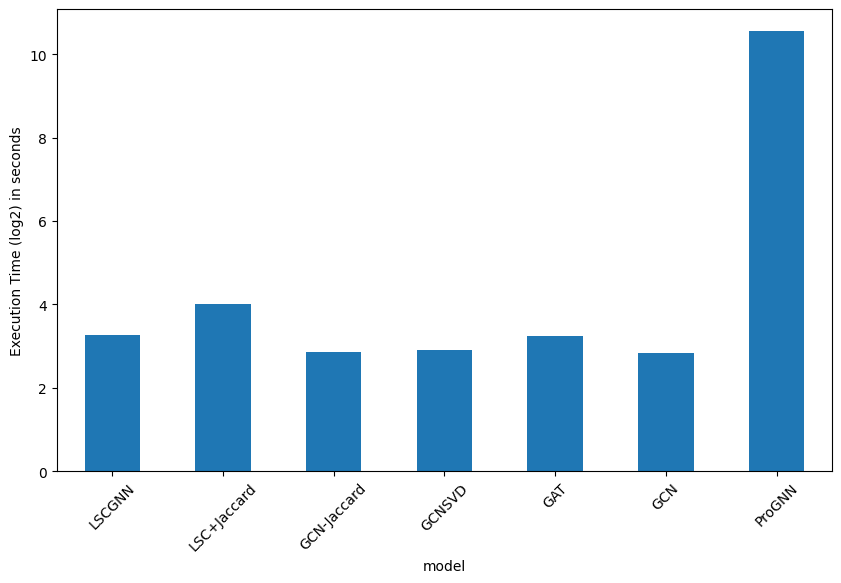

In [232]:
import numpy as np
import matplotlib.pyplot as plt

# Filter data
df_plot = df_combined[(df_combined['perturb_rate'] == 0.15) & (df_combined['dataset'] == 'Cora') &
                      (df_combined['target_ratio'] == '0.70')]
df_plot.loc[:,'execution_time_mean'] = np.log2(df_plot['execution_time_mean'])
# Plot bar chart
fig, ax = plt.subplots(figsize=(10, 6))
df_plot.set_index('model')['execution_time_mean'].plot(kind='bar', ax=ax)
# rotation of x-axis labels
plt.xticks(rotation=45)
ax.set_ylabel('Execution Time (log2) in seconds')
plt.show()
fig.savefig('figures/execution_time.png', bbox_inches='tight', dpi=300)

In [222]:
def bold_max_in_group(df, group_cols, value_col, target_col):
    df = df.copy()

    # Find the max accuracy_mean per group
    max_idx = df.groupby(group_cols)[value_col].idxmax()

    # Apply bold formatting to mean_std for the max values
    df.loc[max_idx, target_col] = df.loc[max_idx, target_col].apply(lambda x: f"\\textbf{{{x}}}")

    return df


In [223]:
group_cols = ['dataset', 'target_ratio', 'perturb_rate']
value_col = 'accuracy_mean'
target_col = 'mean_std'

df_combined = bold_max_in_group(df_combined, group_cols, value_col, target_col)
df_combined


,dataset,target_ratio,perturb_rate,model,accuracy_mean,mean_std,execution_time_mean
0,CiteSeer,0.50,0.00,LSCGNN,70.03,70.03±1.07,9.965000
1,CiteSeer,0.50,0.05,LSCGNN,71.20,71.2±1.5,9.668000
2,CiteSeer,0.50,0.10,LSCGNN,70.09,70.09±1.03,9.885000
3,CiteSeer,0.50,0.15,LSCGNN,69.19,69.19±1.21,9.775000
4,CiteSeer,0.50,0.20,LSCGNN,69.97,\textbf{69.97±1.16},9.844000
...,...,...,...,...,...,...,...
415,PubMed,0.90,0.25,GCN,78.35,78.35±1.12,8.453320
416,PubMed,0.90,0.30,GCN-Jaccard,78.20,78.20±0.97,16.692430
417,PubMed,0.90,0.30,GCNSVD,80.70,\textbf{80.70±0.15},1192.119775
418,PubMed,0.90,0.30,GAT,77.58,77.58±0.65,10.535410


In [224]:
import pandas as pd

# Define desired order for multi-index levels
desired_target_ratio_order = ['0.50', '0.70', '0.90']
desired_dataset_order = ['Cora', 'CiteSeer', 'PubMed']
desired_model_order = ['GCN', 'GAT', 'GCN-Jaccard', 'GCNSVD',  'ProGNN', 'LSCGNN', 'LSC+Jaccard']  # Customize as needed

# Ensure categorical ordering before pivoting
df_combined["target_ratio"] = pd.Categorical(df_combined["target_ratio"], categories=desired_target_ratio_order, ordered=True)
df_combined["dataset"] = pd.Categorical(df_combined["dataset"], categories=desired_dataset_order, ordered=True)
df_combined["model"] = pd.Categorical(df_combined["model"], categories=desired_model_order, ordered=True)

# Pivot the table to match the requested format
df_transformed = df_combined.pivot(index=["target_ratio", "dataset", "model"], columns="perturb_rate", values=["mean_std"])

# Flatten column names for readability
df_transformed.columns = [f"{round(col[1], 2)}" for col in df_transformed.columns]
df_transformed.index.names = ['Ratio', 'Dataset', 'Model']

# Sort by the custom order
df_transformed = df_transformed.sort_index(level=['Ratio', 'Dataset', 'Model'])
df_transformed


0.0                 0.05  \
Ratio Dataset  Model                                                   
0.50  Cora     GCN                   79.11±1.59           78.22±2.04   
               GAT                   79.26±1.31           76.63±1.47   
               GCN-Jaccard           77.60±1.84           77.59±2.03   
               GCNSVD                77.74±0.36           76.04±0.45   
               ProGNN       \textbf{81.52±0.32}  \textbf{82.44±0.70}   
               LSCGNN                 78.0±1.47           77.85±1.38   
               LSC+Jaccard            77.6±1.43           76.78±0.65   
      CiteSeer GCN                   69.04±0.83           67.83±1.03   
               GAT                   68.34±1.48           67.47±1.46   
               GCN-Jaccard           69.88±1.05           69.58±1.08   
               GCNSVD                71.08±0.48           70.39±0.37   
               ProGNN       \textbf{74.70±0.30}  \textbf{73.29±0.17}   
               LSCGNN                70.03±1.07             71.2±1.5   
               LSC+Jaccard           70.54±0.63           69.76±1.32   
      PubMed   GCN                   83.74±0.58           81.55±0.63   
               GAT                   83.65±1.06           81.84±0.95   
               GCN-Jaccard           83.91±0.62           81.54±0.48   
               GCNSVD                85.26±0.12  \textbf{84.97±0.18}   
               LSCGNN                85.93±0.42           84.63±0.51   
               LSC+Jaccard  \textbf{86.12±0.68}           84.74±0.68   
0.70  Cora     GCN                   82.64±0.59           81.14±1.28   
               GAT                   82.72±1.21           80.34±1.47   
               GCN-Jaccard           81.53±0.83           81.06±0.76   
               GCNSVD                80.24±0.35           78.79±0.47   
               ProGNN       \textbf{83.27±0.38}           81.64±0.54   
               LSCGNN                81.03±2.19  \textbf{82.72±1.24}   
               LSC+Jaccard            79.89±1.5           79.26±1.71   
      CiteSeer GCN                   72.24±0.79           70.11±1.39   
               GAT                   71.12±1.31           68.52±1.01   
               GCN-Jaccard           72.15±0.84           70.78±1.09   
               GCNSVD                71.01±0.42           69.20±0.32   
               ProGNN                70.39±0.13           69.03±0.22   
               LSCGNN       \textbf{74.19±1.07}           69.87±1.46   
               LSC+Jaccard           74.15±0.85   \textbf{72.92±0.7}   
      PubMed   GCN                   84.33±0.50           82.04±0.72   
               GAT                   83.45±0.77           81.56±0.77   
               GCN-Jaccard           84.23±0.41           82.05±0.77   
               GCNSVD                84.57±0.17           83.70±0.11   
               LSCGNN         \textbf{86.0±0.6}  \textbf{85.37±0.69}   
               LSC+Jaccard             85.3±1.4           83.15±3.96   
0.90  Cora     GCN                   87.13±0.76           84.07±0.80   
               GAT                   87.27±0.89           83.84±1.00   
               GCN-Jaccard           85.48±0.71           84.23±0.80   
               GCNSVD                81.21±0.17           79.20±0.46   
               ProGNN       \textbf{88.40±0.24}  \textbf{85.61±0.40}   
               LSCGNN                85.73±1.74           83.41±1.31   
               LSC+Jaccard            85.77±1.5           83.92±1.36   
      CiteSeer GCN                   72.12±0.65           68.43±0.94   
               GAT                   72.02±0.87           68.16±0.52   
               GCN-Jaccard           72.52±0.65           70.08±0.52   
               GCNSVD                72.39±0.35           71.35±0.38   
               ProGNN                73.01±0.51           71.12±0.17   
               LSCGNN                73.84±1.05  \textbf{73.72±1.35}   
               LSC+Jaccard  \textbf{73.92±1.22}           73.22±0.95   
      PubMed

In [225]:
latex_table = df_transformed.to_latex()
print(latex_table)

\begin{tabular}{llllllllll}
\toprule
 &  &  & 0.0 & 0.05 & 0.1 & 0.15 & 0.2 & 0.25 & 0.3 \\
Ratio & Dataset & Model &  &  &  &  &  &  &  \\
\midrule
\multirow[t]{20}{*}{0.50} & \multirow[t]{7}{*}{Cora} & GCN & 79.11±1.59 & 78.22±2.04 & 76.89±2.18 & 75.67±1.90 & 74.93±1.82 & 72.26±1.77 & 73.04±2.09 \\
 &  & GAT & 79.26±1.31 & 76.63±1.47 & 77.11±1.19 & 76.11±2.32 & 73.48±1.88 & 72.59±2.00 & 71.48±2.55 \\
 &  & GCN-Jaccard & 77.60±1.84 & 77.59±2.03 & 76.89±2.45 & 75.33±2.02 & 75.56±1.78 & 74.59±2.11 & 73.37±2.05 \\
 &  & GCNSVD & 77.74±0.36 & 76.04±0.45 & 76.15±0.57 & 75.93±0.61 & 73.81±0.59 & 71.78±0.81 & 70.04±0.65 \\
 &  & ProGNN & \textbf{81.52±0.32} & \textbf{82.44±0.70} & \textbf{80.44±0.38} & 79.00±0.70 & 76.85±1.21 & 76.19±1.01 & 73.48±1.11 \\
 &  & LSCGNN & 78.0±1.47 & 77.85±1.38 & 77.19±1.05 & \textbf{82.96±1.32} & \textbf{79.41±2.07} & 76.63±1.28 & \textbf{80.44±1.38} \\
 &  & LSC+Jaccard & 77.6±1.43 & 76.78±0.65 & 77.22±1.04 & 77.04±1.93 & 77.48±1.88 & \textbf{76.67±1.65} & 75

# Plot ablation analysis

In [226]:
df_ablation = pd.read_json('results/results_ablation.json', lines=True)
df_ablation['target_ratio'] = df_ablation['target_ratio'].apply(lambda x: f"{x:.2f}")
df_ablation['model_type'] = 'LSCGNN'
df_ablation_agg = df_ablation.groupby(['dataset', 'target_ratio', 'perturb_rate', 'use_edge_for_predict',  'model_type', 'layer_type']).agg({'accuracy':['mean', 'std']})
# remove second level of column
df_ablation_agg.columns = ['_'.join(col).strip('_') for col in df_ablation_agg.columns.values]
df_ablation_agg = (100 * df_ablation_agg).round(2)
df_ablation_agg = df_ablation_agg.reset_index()

In [227]:
df_ablation_agg = df_ablation_agg.reset_index()
df_ablation_agg['model'] = df_ablation_agg['use_edge_for_predict']
# remove model_type and layer_type columns
df_ablation_agg = df_ablation_agg.drop(columns=['model_type', 'layer_type', 'use_edge_for_predict'])
df_ablation_agg

,index,dataset,target_ratio,perturb_rate,accuracy_mean,accuracy_std,model
0,0,CiteSeer,0.50,0.00,63.89,2.31,regularization
1,1,CiteSeer,0.50,0.00,66.99,1.49,target
2,2,CiteSeer,0.50,0.05,63.77,2.34,regularization
3,3,CiteSeer,0.50,0.05,65.30,0.94,target
4,4,CiteSeer,0.50,0.10,63.83,2.35,regularization
...,...,...,...,...,...,...,...
121,121,PubMed,0.90,0.20,77.95,0.91,target
122,122,PubMed,0.90,0.25,86.01,0.63,regularization
123,123,PubMed,0.90,0.25,76.24,0.69,target
124,124,PubMed,0.90,0.30,86.12,0.69,regularization


In [228]:
df_ablation_agg = pd.concat([df_ablation_agg, df_combined], axis=0)
df_ablation_agg = df_ablation_agg.loc[df_ablation_agg['model'].isin(['LSC+Jaccard', 'LSCGNN', 'target', 'regularization', 'GAT', 'GCN-Jaccard'])]
df_ablation_agg['model'] = df_ablation_agg['model'].replace({'LSCGNN': 'LSCGNN', 'target': 'GAT_target', 'regularization': 'GAT_reg', 'GAT': 'GAT_full'})
df_ablation_agg = df_ablation_agg.reset_index(drop=True)
df_ablation_agg

,index,dataset,target_ratio,perturb_rate,accuracy_mean,accuracy_std,model,mean_std,execution_time_mean
0,0.0,CiteSeer,0.50,0.00,63.89,2.31,GAT_reg,NaN,NaN
1,1.0,CiteSeer,0.50,0.00,66.99,1.49,GAT_target,NaN,NaN
2,2.0,CiteSeer,0.50,0.05,63.77,2.34,GAT_reg,NaN,NaN
3,3.0,CiteSeer,0.50,0.05,65.30,0.94,GAT_target,NaN,NaN
4,4.0,CiteSeer,0.50,0.10,63.83,2.35,GAT_reg,NaN,NaN
...,...,...,...,...,...,...,...,...,...
373,NaN,PubMed,0.90,0.20,78.61,NaN,GAT_full,78.61±1.01,10.62650
374,NaN,PubMed,0.90,0.25,78.33,NaN,GCN-Jaccard,78.33±0.85,15.87544
375,NaN,PubMed,0.90,0.25,77.58,NaN,GAT_full,77.58±0.67,11.01439
376,NaN,PubMed,0.90,0.30,78.20,NaN,GCN-Jaccard,78.20±0.97,16.69243


In [229]:
df_ablation_result = df_ablation_agg.loc[(df_ablation_agg['dataset'] == 'CiteSeer') & (df_ablation_agg['target_ratio'] == '0.70')]
df_ablation_result

,index,dataset,target_ratio,perturb_rate,accuracy_mean,accuracy_std,model,mean_std,execution_time_mean
14,14.0,CiteSeer,0.70,0.00,66.69,1.63,GAT_reg,NaN,NaN
15,15.0,CiteSeer,0.70,0.00,68.65,0.72,GAT_target,NaN,NaN
16,16.0,CiteSeer,0.70,0.05,66.86,1.66,GAT_reg,NaN,NaN
17,17.0,CiteSeer,0.70,0.05,65.74,1.10,GAT_target,NaN,NaN
18,18.0,CiteSeer,0.70,0.10,66.62,1.54,GAT_reg,NaN,NaN
19,19.0,CiteSeer,0.70,0.10,62.17,1.62,GAT_target,NaN,NaN
20,20.0,CiteSeer,0.70,0.15,66.84,1.70,GAT_reg,NaN,NaN
21,21.0,CiteSeer,0.70,0.15,58.71,1.24,GAT_target,NaN,NaN
22,22.0,CiteSeer,0.70,0.20,66.86,1.74,GAT_reg,NaN,NaN
23,23.0,CiteSeer,0.70,0.20,56.62,1.73,GAT_target,NaN,NaN


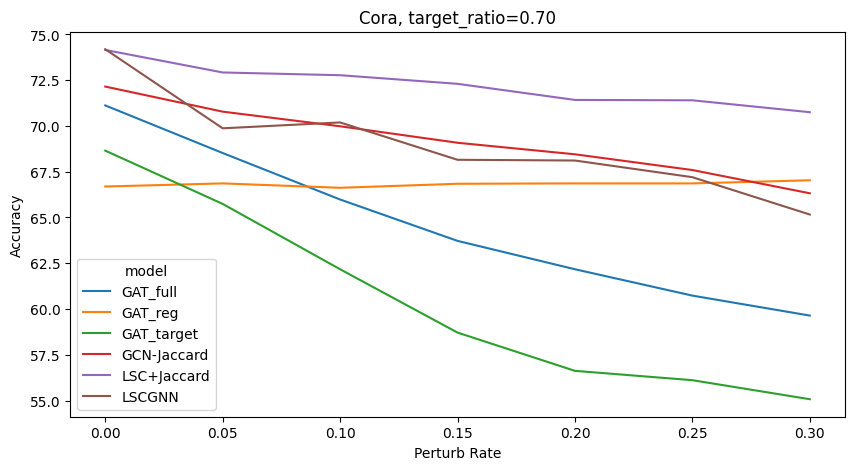

In [231]:
# plot accuracy_mean over perturb_rate
fig, ax = plt.subplots(figsize=(10, 5))
df_ablation_result.pivot(index='perturb_rate', columns='model', values='accuracy_mean').plot(ax=ax)
ax.set_xlabel('Perturb Rate')
ax.set_ylabel('Accuracy')
ax.set_title('Cora, target_ratio=0.70')
# save fig
fig.savefig('figures/ablation.png', bbox_inches='tight', dpi=300)


# Ablation for regularization strength

In [150]:
df_best = pd.read_json('results/results_LSC.json', lines=True)
df_best['target_ratio'] = df_best['target_ratio'].apply(lambda x: f"{x:.2f}")
df_best['model_type'] = 'LSCGNN'
df_best['layer_type'] = 'GAT'

df_best = df_best.groupby(['dataset', 'seed', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).apply(lambda x: x.loc[x['val_loss'].idxmin()], include_groups=False)[['accuracy', 'regularization', 'execution_time']]
# get mean of regularization by "dataset", "target_ratio", "perturb_rate"
df_best_regularization = df_best.groupby(['dataset', 'target_ratio', 'perturb_rate', 'model_type', 'layer_type']).agg({'regularization':['mean']})
# flatten the columns
df_best_regularization.columns = ['_'.join(col).strip('_') for col in df_best_regularization.columns.values]
df_best_regularization

regularization_mean
dataset  target_ratio perturb_rate model_type layer_type                     
CiteSeer 0.50         0.00         LSCGNN     GAT                         4.4
                      0.05         LSCGNN     GAT                         3.6
                      0.10         LSCGNN     GAT                         2.9
                      0.15         LSCGNN     GAT                         3.5
                      0.20         LSCGNN     GAT                         4.4
...                                                                       ...
PubMed   0.90         0.10         LSCGNN     GAT                        14.3
                      0.15         LSCGNN     GAT                        14.6
                      0.20         LSCGNN     GAT                        12.4
                      0.25         LSCGNN     GAT                        17.2
                      0.30         LSCGNN     GAT                        16.0

[63 rows x 1 columns]

Text(0.5, 1.0, 'Cora, target_ratio=0.70')

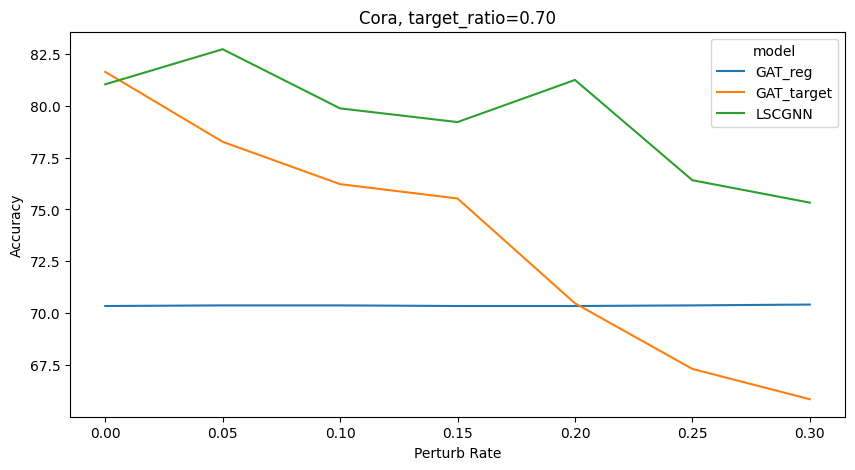

In [235]:
ax.set_ylabel('Accuracy')
ax.set_title('Cora, target_ratio=0.70')

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

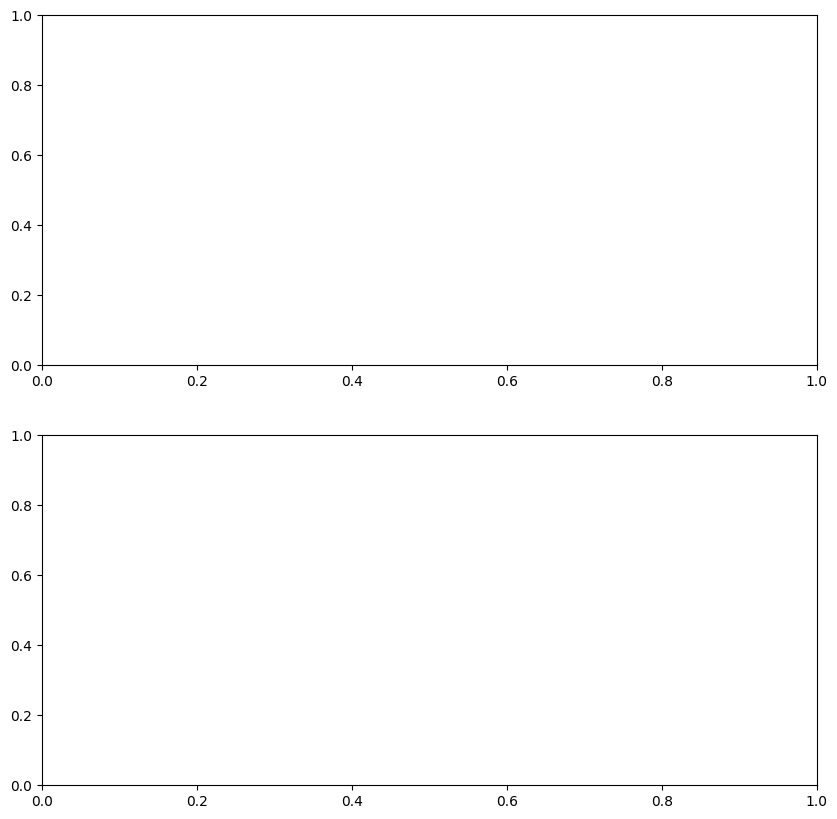

In [22]:
# plot for validation loss

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Define a list of markers
markers = ['o', 's', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Create a color map
colors = list(mcolors.TABLEAU_COLORS.keys())
split_ratios = df_agg['target_ratio'].unique()
color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}

# Create a marker map
false_pos_edge_ratios = df_agg['perturb_rate'].unique()
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# plot for different target_ratio and perturb_rate
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]
        # plot accuracy
        ax[0].plot([0, 1, 2, 3, 4, 5], df_current['val_best_loss_mean'],
                   label=f'target_ratio={split_ratio}, perturb_rate={false_pos_edge_ratio}',
                   marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
        # add error bar
        ax[0].set_xticks([0, 1, 2, 3, 4, 5])
        ax[0].grid(axis='y')
        ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
        ax[0].set_xlabel('Regularization')
        ax[0].set_title('accuracy')

# Create a custom legend
from matplotlib.lines import Line2D
# Create a custom legend
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
ax[0].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))
ax[1].legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# save above plot as a figure
fig.savefig('figures/pubmed_accuracy_ap.png', bbox_inches='tight', dpi=300)

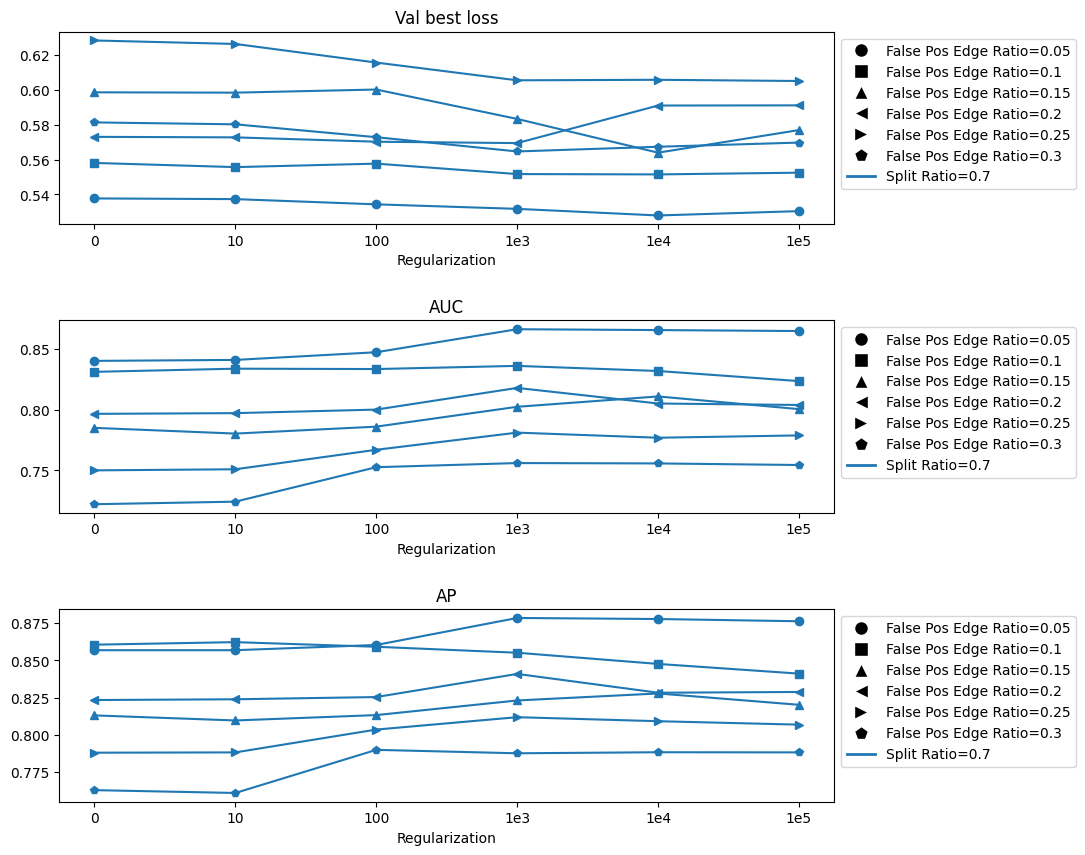

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

fig, ax = plt.subplots(3, 1, figsize=(10, 10))

# Define markers and colors
markers = ['o', 's', '^', '<', '>', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']
colors = list(mcolors.TABLEAU_COLORS.keys())

split_ratios = df_agg['target_ratio'].unique()
false_pos_edge_ratios = df_agg['perturb_rate'].unique()

color_map = {split_ratio: colors[i % len(colors)] for i, split_ratio in enumerate(split_ratios)}
marker_map = {false_pos_edge_ratio: markers[i % len(markers)] for i, false_pos_edge_ratio in enumerate(false_pos_edge_ratios)}

# Plot for different target_ratio and perturb_rate
for split_ratio in split_ratios:
    for false_pos_edge_ratio in false_pos_edge_ratios:
        df_current = df_agg[(df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

        for i, metric in enumerate(['val_best_loss_mean', 'accuracy_mean', 'AP_mean']):
            ax[i].plot([0, 1, 2, 3, 4, 5], df_current[metric],
                       label=f'target_ratio={split_ratio}, perturb_rate={false_pos_edge_ratio}',
                       marker=marker_map[false_pos_edge_ratio], color=color_map[split_ratio])
            ax[i].set_xticks([0, 1, 2, 3, 4, 5])
            ax[i].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
            ax[i].set_xlabel('Regularization')
            ax[i].grid(axis='y')

        ax[0].set_title('Val best loss')
        ax[1].set_title('accuracy')
        ax[2].set_title('AP')

# Adjust space between plots
plt.subplots_adjust(hspace=0.5)

# Create a custom legend
legend_elements = [Line2D([0], [0], marker=marker_map[false_pos_edge_ratio], color='w', label=f'False Pos Edge Ratio={false_pos_edge_ratio}',
                          markerfacecolor='k', markersize=10) for false_pos_edge_ratio in false_pos_edge_ratios] + \
                  [Line2D([0], [0], color=color_map[split_ratio], lw=2, label=f'Split Ratio={split_ratio}') for split_ratio in split_ratios]
for a in ax:
    a.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1, 1))

# Save the plot as a figure
fig.savefig('figures/pubmed_accuracy_ap.png', bbox_inches='tight', dpi=300)

In [172]:

df_agg_current = df_agg[(df_agg['dataset'] == dataset) & (df_agg['target_ratio'] == split_ratio) & (df_agg['perturb_rate'] == false_pos_edge_ratio)]

# plot accuracy
ax[0].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['accuracy']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
# ax[0].errorbar([0, 1, 2, 3, 4, 5],
#                df_agg[(df_agg['dataset'] == dataset)]['accuracy']['mean'],
#                yerr=df_agg[(df_agg['dataset'] == dataset)]['accuracy']['std'], fmt='o')
ax[0].set_xticks([0, 1, 2, 3, 4, 5])
ax[0].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[0].set_xlabel('Regularization')
ax[0].set_title('accuracy')
ax[0].legend()

# plot AP
ax[1].plot([0, 1, 2, 3, 4, 5],
           df_agg_current['AP']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax[1].set_xticks([0, 1, 2, 3, 4, 5])
ax[1].set_xticklabels(['0', '10', '100', '1e3', '1e4', '1e5'])
ax[1].set_xlabel('Regularization')
ax[1].set_title('AP')
ax[1].legend()

TypeError: 'Axes' object is not subscriptable

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['execution_time']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')

In [ ]:
# plot execution time over different regularization
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot([0, 1, 2, 3, 4, 5], df_agg[(df_agg['dataset'] == dataset)]['best_epochs']['mean'], label=f'{dataset}, split=0.5, false_pos_edge=0.5')
ax.set_xticks([0, 1, 2, 3, 4, 5])
ax.set_xticklabels(['0', '1', '10', '100', '1e3', '1e4'])
ax.set_xlabel('Regularization')
ax.set_ylabel('Execution Time in seconds')
ax.set_title('Execution Time')